#bayes


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pymc3 as pm

In [ ]:
N = 40
a = 2

with pm.Model() as model:
  theta = pm.Uniform('theta',lower=0,upper=1)
  obs = pm.Binomial('a',p=theta,n=N,observed=a)
  trace = pm.sample(5000,chains=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 8 seconds.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  


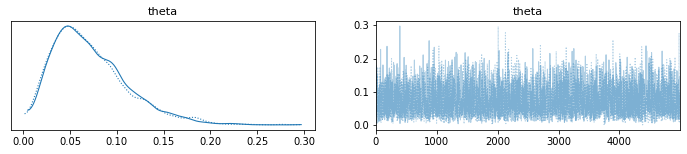

In [ ]:
with model:
  pm.traceplot(trace)

In [ ]:
with model:
  print(pm.summary(trace, hdi_prob=0.95))

        mean    sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
theta  0.072  0.04     0.007      0.149      0.001      0.0    4403.0   

       ess_tail  r_hat  
theta    4914.0    1.0  


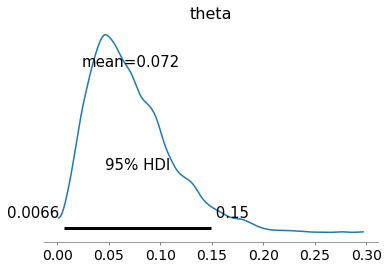

In [ ]:
with model:
  pm.plot_posterior(trace, hdi_prob=0.95)

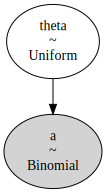

In [ ]:
pm.model_to_graphviz(model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  after removing the cwd from sys.path.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 9 seconds.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  


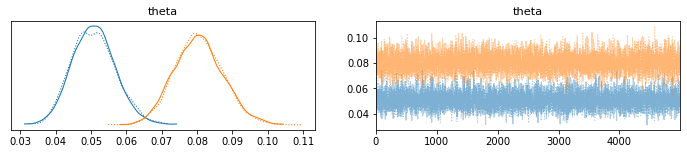

In [ ]:
with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
  obs = pm.Binomial('obs', p=theta, n=[1280,1600],observed=[64,128])
  trace = pm.sample(5000,chains=2)
  pm.traceplot(trace,['theta'],compact=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  after removing the cwd from sys.path.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 7 seconds.


0.9994


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  


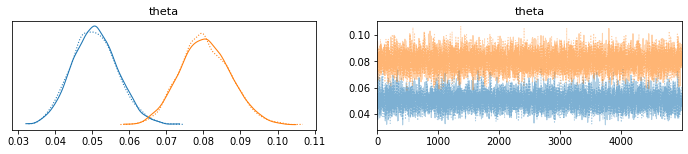

In [ ]:
with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
  obs = pm.Binomial('obs', p=theta, n=[1280,1600],observed=[64,128])
  trace = pm.sample(5000,chains=2)
  print((trace['theta'][:,0] < trace['theta'][:,1]).mean())
  pm.traceplot(trace,['theta'],compact=True)

In [ ]:
print((trace['theta'][:,0] < trace['theta'][:,1]).mean())

0.9994


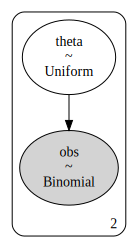

In [ ]:
pm.model_to_graphviz(model)

In [ ]:
with pm.Model() as model:
  theta_1 = pm.Uniform('theta_1', lower=0, upper=1)
  n1 = pm.Binomial('n1', p=theta_1, n=[1280],observed=[64])

  theta_2 = pm.Uniform('theta_2', lower=0, upper=1) 
  n2 = pm.Binomial('n2', p=theta_2, n=[1600],observed=[128])

  delta = pm.Deterministic('delta', theta_1 - theta_2)
  trace = pm.sample(5000,chains=2)
  
  #pm.traceplot(trace,['theta'],compact=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if __name__ == '__main__':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta_2, theta_1]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 7 seconds.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  


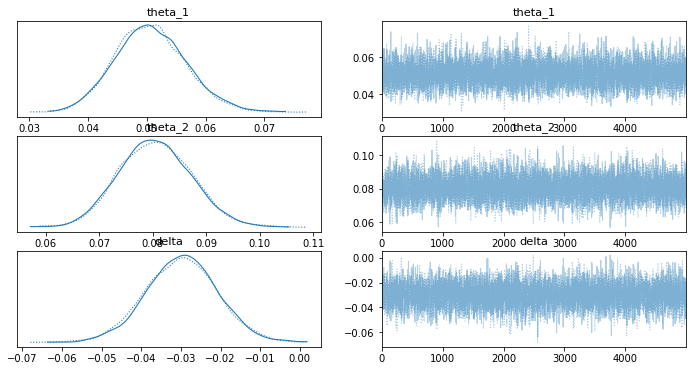

In [ ]:
with model:
  pm.traceplot(trace)

In [ ]:
with model:
  print(pm.summary(trace, hdi_prob=0.95))

          mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
theta_1  0.051  0.006     0.039      0.063        0.0      0.0    9046.0   
theta_2  0.081  0.007     0.068      0.094        0.0      0.0    9513.0   
delta   -0.030  0.009    -0.049     -0.013        0.0      0.0    9377.0   

         ess_tail  r_hat  
theta_1    7327.0    1.0  
theta_2    6874.0    1.0  
delta      6900.0    1.0  


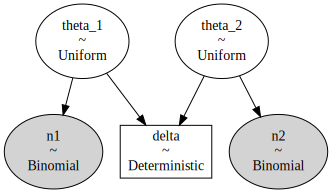

In [ ]:
pm.model_to_graphviz(model)

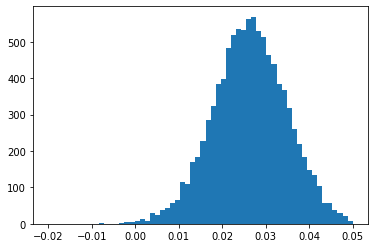

In [8]:
theta_a = np.random.beta(64,1280,size=10000)
theta_b = np.random.beta(128,1600,size=10000)
delta = theta_b - theta_a
plt.hist(delta,range=(-0.02,0.05),bins=60)
plt.show()

In [ ]:
with pm.Model() as model:
  n1 = pm.Beta('n1',64,1280) 
  n2 = pm.Beta('n2',128,1600)
  delta = pm.Deterministic('delta', n2-n1)
  trace = pm.sample(5000,chains=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  """
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [n2, n1]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 8 seconds.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  


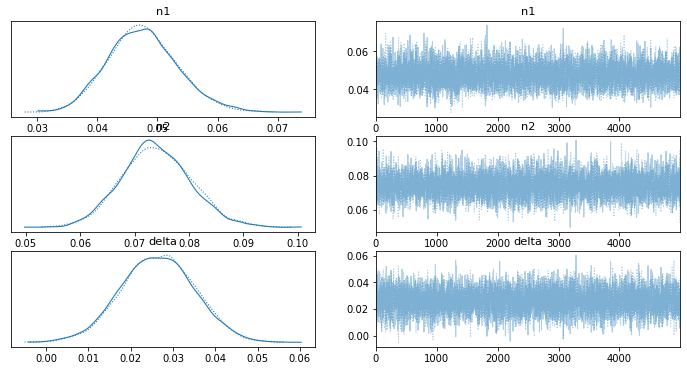

In [ ]:
with model:
  pm.traceplot(trace)

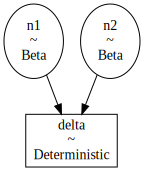

In [ ]:
pm.model_to_graphviz(model)

In [ ]:
with model:
  print(pm.summary(trace, hdi_prob=0.95))
  pm.traceplot(trace)

        mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
n1     0.048  0.006     0.036      0.059        0.0      0.0    8174.0   
n2     0.074  0.006     0.062      0.087        0.0      0.0    9193.0   
delta  0.027  0.009     0.010      0.043        0.0      0.0    8478.0   

       ess_tail  r_hat  
n1       6435.0    1.0  
n2       6911.0    1.0  
delta    7210.0    1.0  


In [2]:
with pm.Model() as model:
  theta_1 = pm.Uniform('theta_1', lower=0, upper=1)
  n1 = pm.Binomial('n1', p=theta_1, n=[39],observed=[3])

  theta_2 = pm.Uniform('theta_2', lower=0, upper=1) 
  n2 = pm.Binomial('n2', p=theta_2, n=[47],observed=[40])

  delta = pm.Deterministic('delta', theta_2 - theta_1)
  trace = pm.sample(5000,chains=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if __name__ == '__main__':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta_2, theta_1]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 11 seconds.


          mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
theta_1  0.097  0.047     0.020      0.192      0.001    0.000    7620.0   
theta_2  0.836  0.053     0.729      0.932      0.001    0.000    9207.0   
delta    0.739  0.071     0.603      0.871      0.001    0.001    8795.0   

         ess_tail  r_hat  
theta_1    5381.0    1.0  
theta_2    6331.0    1.0  
delta      6526.0    1.0  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  after removing the cwd from sys.path.


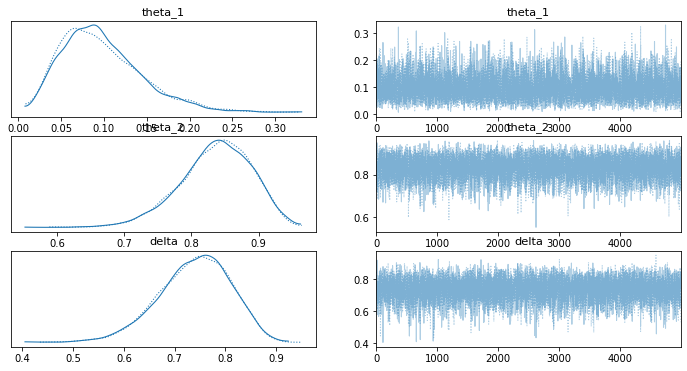

In [3]:
with model:
  print(pm.summary(trace, hdi_prob=0.95))
  pm.model_to_graphviz(model)
  pm.traceplot(trace)

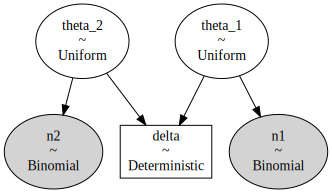

In [4]:
pm.model_to_graphviz(model)

In [ ]:
print(((trace['theta_2'] - trace['theta_1']) > 0).mean())

0.6514


In [5]:
with pm.Model() as model:
  theta_1 = pm.Uniform('theta_1', lower=0, upper=1)
  n1 = pm.Binomial('n1', p=theta_1, n=[39],observed=[3])

  theta_2 = pm.Uniform('theta_2', lower=0, upper=1) 
  n2 = pm.Binomial('n2', p=theta_2, n=[47],observed=[40])

  delta = pm.Deterministic('delta', n2 - n1)
  trace = pm.sample(5000,chains=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if __name__ == '__main__':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta_2, theta_1]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 13 seconds.


/usr/local/lib/python3.7/dist-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  after removing the cwd from sys.path.


            mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
theta_1    0.098  0.046      0.02      0.189      0.001      0.0    7620.0   
theta_2    0.836  0.053      0.73      0.930      0.001      0.0    7761.0   
delta[0]  37.000  0.000     37.00     37.000      0.000      0.0   10000.0   

          ess_tail  r_hat  
theta_1     5502.0    1.0  
theta_2     6253.0    1.0  
delta[0]   10000.0    NaN  


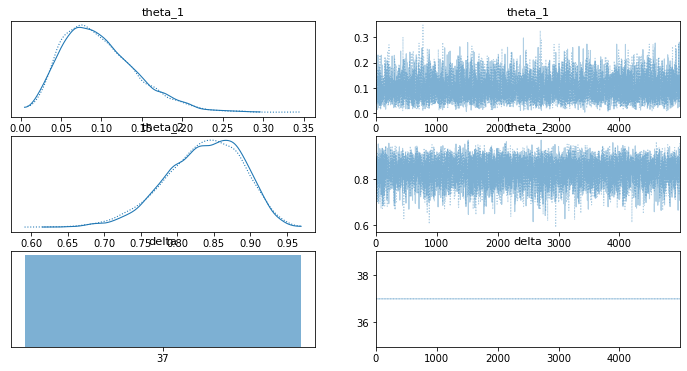

In [6]:
with model:
  print(pm.summary(trace, hdi_prob=0.95))
  pm.model_to_graphviz(model)
  pm.traceplot(trace)

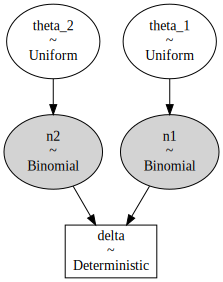

In [7]:
pm.model_to_graphviz(model)

# ε- greedy

In [26]:
import numpy as np
np.random.seed(0)

n_arms=4

class Env(object):
  thetas = [0.1, 0.1, 0.2, 0.3]

  def react(arm):
    #return 1 if np.random.random() < Env.thetas[arm] else 0
    if np.random.random() < Env.thetas[arm]:
      return 1
    else:
       return 0
  def opt():
    return np.argmax(Env.thetas)


In [27]:
class EpsilonGredyAgent(object):

  def __init__(self, epsilon=0.1):
    self.epsilon = epsilon
    self.counts = np.zeros(n_arms)
    self.values = np.zeros(n_arms)
  def get_arm(self):
    if np.random.random() < self.epsilon:
      arm = np.random.randint(n_arms)
    else:
      arm = np.argmax(self.values)
    return arm
  def sample(self, arm, reward):
    self.counts[arm] += 1
    self.values[arm] = (
        (self.counts[arm] - 1) * self.values[arm] + reward
        ) / self.counts[arm]

In [28]:
def sim(Agent, N=1000, T=1000, **kwargs):
  selected_arms = [[0 for _ in range(T)] for _ in range(N)]
  earned_rewards = [[0 for _ in range(T)] for _ in range(N)]

  for n in range(N):
    agent = Agent(**kwargs)
    for t in range(T):
      arm = agent.get_arm()
      reward = Env.react(arm)
      agent.sample(arm,reward)
      selected_arms[n][t] = arm
      earned_rewards[n][t] = reward
  return np.array(selected_arms), np.array(earned_rewards)

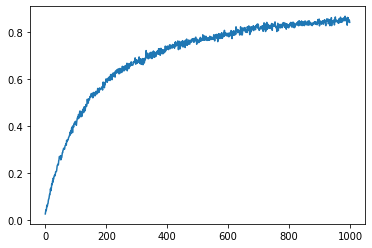

In [29]:
arms_eg, rewards_eg = sim(EpsilonGredyAgent)
acc = np.mean(arms_eg == Env.opt(), axis=0)

plt.plot(acc)
plt.show()

# 焼きなましε- greedy

In [36]:
class AnnealingEpsilonGreedyAgent(object):
  def __init__(self, epsilon=1.0):
    self.epsilon = epsilon
    self.counts = np.zeros(n_arms)
    self.values = np.zeros(n_arms)

  def get_arm(self):
    if np.random.random() < self.epsilon:
      arm = np.random.randint(n_arms)
    else:
      arm = np.argmax(self.values)
    self.epsilon *= 0.99
    return arm
  def sample(self, arm, reward):
    self.counts[arm] += 1
    self.values[arm] = (
        (self.counts[arm] -1) *self.values[arm] + reward
    ) / self.counts[arm]

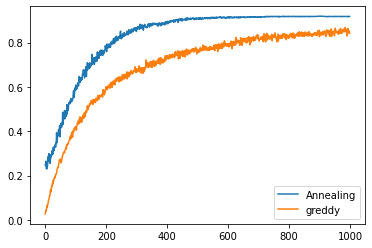

In [37]:
arms_aeg, rewards_eg = sim(AnnealingEpsilonGreedyAgent)

plt.plot(np.mean(arms_aeg == Env.opt(),axis=0),
         label=r'Annealing')
plt.plot(np.mean(arms_eg == Env.opt(),axis=0),
         label='greddy')
plt.legend()
plt.show()



---

2*3\3kdkd

---

